Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None, title=''):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);
    plt.title(title)
    plt.show()

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

In [4]:
import numpy as np

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

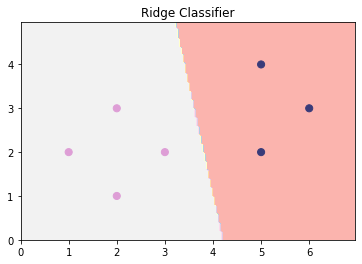

In [6]:
model = RidgeClassifier(alpha=0)
model.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, model.predict, title='Ridge Classifier')

In [7]:
y_pred = model.predict(seven_X)
accuracy_score(seven_y, y_pred)

1.0

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

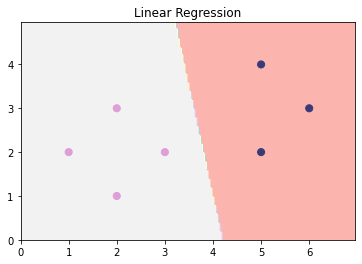

In [8]:
reg_model = LinearRegression()
reg_model.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x: model.predict(x) >= 0.5, title='Linear Regression')

In [9]:
model.coef_

array([[-0.5, -0.1]])

In [10]:
y_pred_reg = reg_model.predict(seven_X)
print('The linear regression predicted the following:', y_pred_reg)

The linear regression predicted the following: [ 1.   0.9  1.2  0.7  0.2  0.1 -0.1]


In [11]:
y_pred = (y_pred_reg >= 0.5).astype(int)
print('After applying the h(x) >= 5 rule, the values are:', y_pred)

After applying the h(x) >= 5 rule, the values are: [1 1 1 1 0 0 0]


In [12]:
accuracy_score(seven_y, y_pred)

1.0

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [13]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

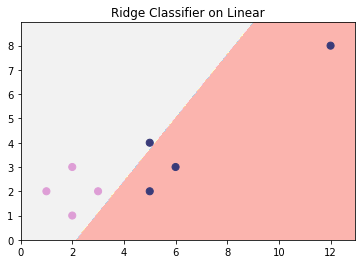

In [14]:
model = RidgeClassifier(alpha=0)
model.fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, model.predict, title='Ridge Classifier on Linear')

In [15]:
y_pred = model.predict(outlier_X)
accuracy_score(outlier_y, y_pred)

0.875

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [16]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

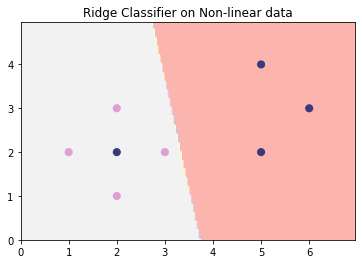

In [17]:
model = RidgeClassifier(alpha=0)
model.fit(unsep_X, unsep_y)

plot_2d_clf_problem(unsep_X, unsep_y, model.predict, title='Ridge Classifier on Non-linear data')

In [18]:
y_pred = model.predict(unsep_X)
accuracy_score(unsep_y, y_pred)

0.875

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

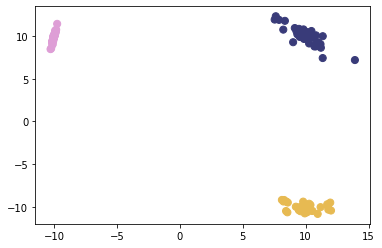

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, 
                           n_classes=3,
                           n_features=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           flip_y=0,
                           class_sep=10)

plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [20]:
def prepare_data(X, y, class_label):
    idx = y == class_label
    idx_not = [not x for x in idx]
    
    X_1 = X[idx, :]
    X_2 = X[idx_not, :]
    
    y_1 = np.ones(len(X_1))
    y_2 = np.zeros(len(X_2))
    
    X_all = np.concatenate((X_1, X_2))
    y_all = np.concatenate((y_1, y_2))
    
    return X_all, y_all

In [21]:
from sklearn.linear_model import Ridge
def train_classifier(X, y):    
    h = Ridge(alpha=0)
    h.fit(X, y)
    return h

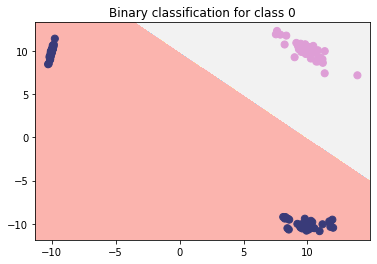

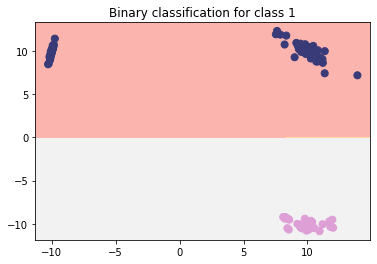

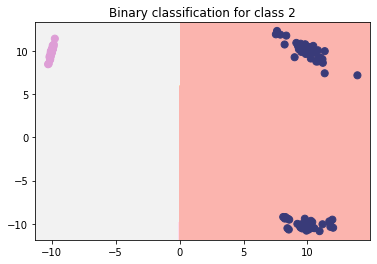

In [22]:
h_list = []
for i in range(3):
    X_temp, y_temp = prepare_data(X, y, class_label=i)
    h = train_classifier(X_temp, y_temp)
    plot_2d_clf_problem(X_temp, y_temp, lambda x: h.predict(x) >= 0.5, title='Binary classification for class {}'.format(i))
    
    h_list.append(h.predict)

In [23]:
def predict_OVR(X):
    return np.argmax(np.array([h(X) for h in h_list]).T, axis=1)

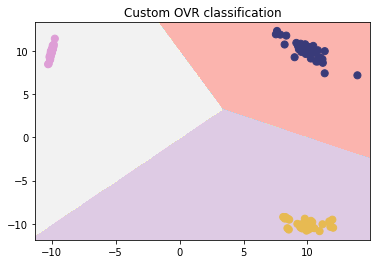

In [24]:
plot_2d_clf_problem(X, y, predict_OVR, title='Custom OVR classification') 

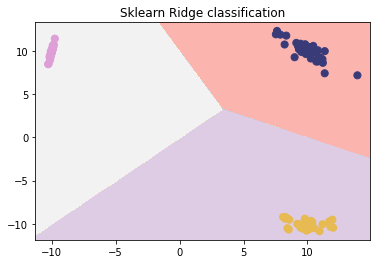

In [25]:
ridge_classification = RidgeClassifier()
ridge_classification.fit(X, y)
plot_2d_clf_problem(X, y, ridge_classification.predict, title='Sklearn Ridge classification') 

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [26]:
import math

In [27]:
def sigm(x, alpha=1):
    return 1/(1 + math.exp(-alpha * x))

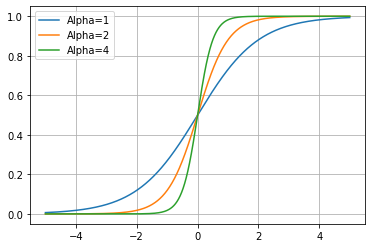

In [28]:
x_axis = np.linspace(-5, 5, num=1000)

for alpha in [1, 2, 4]:
    y = [sigm(x, alpha=alpha) for x in x_axis]
    plt.plot(x_axis, y, label='Alpha={}'.format(alpha))
    plt.grid()
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [29]:
def lr_h(x, w):
    return sigm(np.dot(x, w))

In [30]:
def cross_entropy_loss(x, y, w):
    h = lr_h(x, w)
    return (-y * math.log(h)) - ((1 - y) * math.log(1 - h))

In [31]:
def cross_entropy_error(X, y, w):
    N = X.shape[0]
    loss = np.array([cross_entropy_loss(X[i], y[i], w) for i in range(N)]).sum()
    return 1.0 / N * loss

In [32]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    N, n_features = X.shape
    X_poly = PolynomialFeatures(1).fit_transform(X)
    
    w = np.zeros((n_features + 1, 1))
    w_history = []
    
    error_prev = cross_entropy_error(X_poly, y, w)
    for k in range(max_iter):
        w_history.append(w.copy())
        
        delta_w = np.zeros((n_features, 1))
        delta_w0 = 0
        
        for i in range(N):
            h = lr_h(X_poly[i], w)
            delta_w -= ((h - y[i]) * X[i]).reshape((n_features, 1))
            delta_w0 -= (h - y[i])
        
        w[0] += delta_w0 *eta
        w[1:] = w[1:] * (1 - eta * alpha) + eta * delta_w
        
        error = cross_entropy_error(X_poly, y, w)
        if k %100 == 0:
            print('k={}: {}'.format(k, error))
        
        if abs(error - error_prev) < epsilon:
            print('Stopping beacuse cross_entropy error didn\'t change signifficantly in k={}.'.format(k))
            break
            
        error_prev = error
        
    return (w, w_history) if trace else w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [33]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [34]:
w_model = lr_train(seven_X, seven_y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)

k=0: 0.672835769911289
k=100: 0.39320658656427643
k=200: 0.3130794891152224
k=300: 0.2647466608908616
k=400: 0.2300286218221935
k=500: 0.20351283505415202
k=600: 0.18257398739922184
k=700: 0.16564034829063698
k=800: 0.15168040461331384
k=900: 0.13998381743723964
Stopping beacuse cross_entropy error didn't change signifficantly in k=946.


In [35]:
w_model

array([[ 4.45449454],
       [-1.71089242],
       [ 0.68413507]])

In [36]:
seven_X_poly = PolynomialFeatures(1).fit_transform(seven_X)
error = cross_entropy_error(seven_X_poly, seven_y, w_model)
print('Cross Entropy Error = ', error)

Cross Entropy Error =  0.13521872720206743


In [37]:
def predict_lr(X, w):
    X = PolynomialFeatures(1).fit_transform(X)
    return np.array([lr_h(x, w) >= 0.5 for x in X]).astype(int)

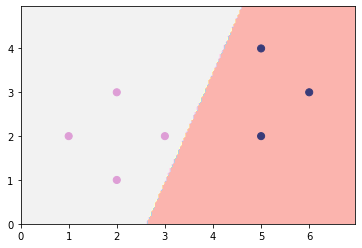

In [38]:
plot_2d_clf_problem(seven_X, seven_y, h=lambda x: predict_lr(x, w_model))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [39]:
from sklearn.metrics import zero_one_loss

In [40]:
def zero_one_loss(X, y, w):
    N = X.shape[0]
    y_pred = predict_lr(X, w)
    count = np.sum([int(y_pred[i] != y[i]) for i in range(N)])
    return count / N

In [41]:
w_model, w_history = lr_train(seven_X, seven_y, trace=True)
seven_X_poly = PolynomialFeatures(1).fit_transform(seven_X)

k=0: 0.672835769911289
k=100: 0.39320658656427643
k=200: 0.3130794891152224
k=300: 0.2647466608908616
k=400: 0.2300286218221935
k=500: 0.20351283505415202
k=600: 0.18257398739922184
k=700: 0.16564034829063698
k=800: 0.15168040461331384
k=900: 0.13998381743723964
Stopping beacuse cross_entropy error didn't change signifficantly in k=946.


In [42]:
cross = []
zero_one = []

for w_k in w_history:
        cross.append(cross_entropy_error(seven_X_poly, seven_y, w_k))
        zero_one.append(zero_one_loss(seven_X, seven_y, w_k))

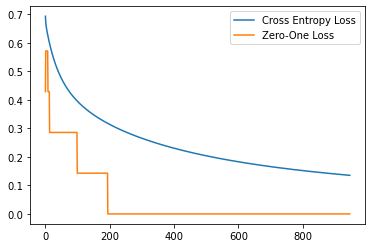

In [43]:
x_axis = range(len(w_history))

plt.plot(x_axis, cross, label='Cross Entropy Loss')
plt.plot(x_axis, zero_one, label='Zero-One Loss')
plt.legend()
plt.show()

k=0: 0.6821776048116837
k=100: 0.47351522092307485
k=200: 0.39397361735516523
k=300: 0.3470946752353298
k=400: 0.31347646095289194
k=500: 0.28696391725440334
k=600: 0.2650223656260164
k=700: 0.24636840610822952
k=800: 0.23024089114628868
k=900: 0.2161338856353737
k=1000: 0.2036839284011501
k=1100: 0.19261616746503138
Stopping beacuse cross_entropy error didn't change signifficantly in k=1141.
k=0: 0.672835769911289
k=100: 0.39320658656427643
k=200: 0.3130794891152224
k=300: 0.2647466608908616
k=400: 0.2300286218221935
k=500: 0.20351283505415202
k=600: 0.18257398739922184
k=700: 0.16564034829063698
k=800: 0.15168040461331384
k=900: 0.13998381743723964
Stopping beacuse cross_entropy error didn't change signifficantly in k=946.
k=0: 0.6534418479297188
k=100: 0.20213611458802674
k=200: 0.12942172709439492
k=300: 0.096278546805189
k=400: 0.07724774784730566
k=500: 0.06481299838429094
Stopping beacuse cross_entropy error didn't change signifficantly in k=510.
k=0: 0.7382291937906307
k=100: 0

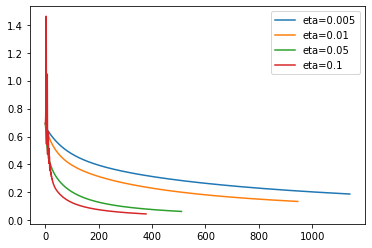

In [44]:
for eta in [0.005, 0.01, 0.05, 0.1]:
    w_model, w_history = lr_train(seven_X, seven_y, trace=True, eta=eta)
    cross = []
    for w_k in w_history:
        cross.append(cross_entropy_error(seven_X_poly, seven_y, w_k))
    
    plt.plot(range(len(w_history)), cross, label='eta={}'.format(eta))

plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

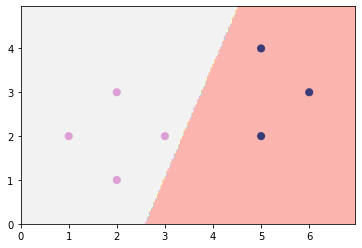

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, C=10, solver='liblinear').fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=model.predict)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

In [46]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

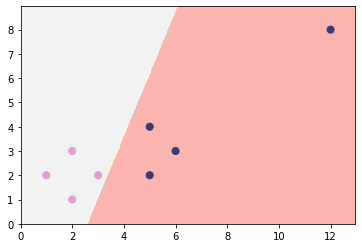

In [47]:
model = LogisticRegression(max_iter=2000, solver='liblinear', C=10).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h=model.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

In [48]:
def draw_example_h(X, y):
    w_model, w_history = lr_train(X, y, trace=True)
    X_poly = PolynomialFeatures(1).fit_transform(X)

    N = X.shape[0]
    for i in range(N):
        x = X_poly[i]
        data = []

        for w in w_history:
            data.append(lr_h(x, w))

        plt.plot(range(len(w_history)), data, label='example {}'.format(i))

        plt.legend()
    plt.grid()
    plt.show()
    return w_history

k=0: 0.672835769911289
k=100: 0.39320658656427643
k=200: 0.3130794891152224
k=300: 0.2647466608908616
k=400: 0.2300286218221935
k=500: 0.20351283505415202
k=600: 0.18257398739922184
k=700: 0.16564034829063698
k=800: 0.15168040461331384
k=900: 0.13998381743723964
Stopping beacuse cross_entropy error didn't change signifficantly in k=946.


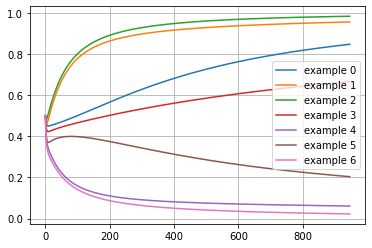

In [49]:
w_history = draw_example_h(seven_X, seven_y)

In [50]:
def draw_w_history(w_history):
    w_history = np.array(w_history)
    N = w_history.shape[1]
    for i in range(N):
        w_data = w_history[:, i, :].T[0]
        plt.plot(range(len(w_data)), w_data, label='w_{}'.format(i))

    plt.legend()
    plt.show()

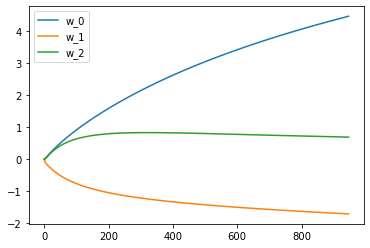

In [51]:
draw_w_history(w_history)

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

In [52]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

k=0: 0.6650560760386899
k=100: 0.4853900823674202
k=200: 0.44672780934502976
k=300: 0.42604162616280394
k=400: 0.412086084331775
Stopping beacuse cross_entropy error didn't change signifficantly in k=453.


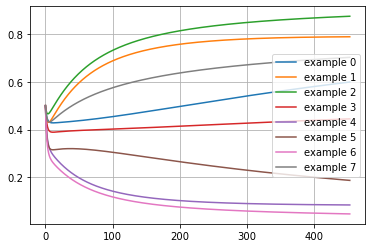

In [53]:
w_history = draw_example_h(unsep_X, unsep_y)

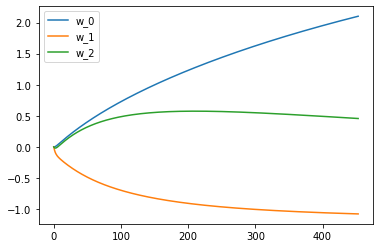

In [54]:
draw_w_history(w_history)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [55]:
from numpy.linalg import norm

k=0: 0.672835769911289
k=100: 0.39320658656427643
k=200: 0.3130794891152224
k=300: 0.2647466608908616
k=400: 0.2300286218221935
k=500: 0.20351283505415202
k=600: 0.18257398739922184
k=700: 0.16564034829063698
k=800: 0.15168040461331384
k=900: 0.13998381743723964
Stopping beacuse cross_entropy error didn't change signifficantly in k=946.
k=0: 0.672835769911289
k=100: 0.4210796307226598
k=200: 0.3470788889346596
k=300: 0.301378426168401
k=400: 0.26926628998538504
k=500: 0.24557146762386683
k=600: 0.22752847517978736
k=700: 0.21344702555686626
k=800: 0.202233102758563
Stopping beacuse cross_entropy error didn't change signifficantly in k=803.
k=0: 0.672835769911289
k=100: 0.5228937110042806
k=200: 0.4725183980397573
k=300: 0.44694498187452614
k=400: 0.4331102782018129
Stopping beacuse cross_entropy error didn't change signifficantly in k=404.
k=0: 0.672835769911289
Stopping beacuse cross_entropy error didn't change signifficantly in k=3.


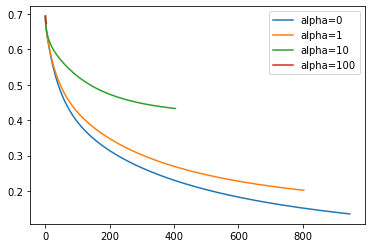

In [56]:
for alpha in [0, 1, 10, 100]:
    seven_X_poly = PolynomialFeatures(1).fit_transform(seven_X)
    w_model, w_history = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    
    cross = []
    for w_k in w_history:
        cross.append(cross_entropy_error(seven_X_poly, seven_y, w_k))
    
    plt.plot(range(len(w_history)), cross, label='alpha={}'.format(alpha))

plt.legend()
plt.show()

k=0: 0.672835769911289
k=100: 0.39320658656427643
k=200: 0.3130794891152224
k=300: 0.2647466608908616
k=400: 0.2300286218221935
k=500: 0.20351283505415202
k=600: 0.18257398739922184
k=700: 0.16564034829063698
k=800: 0.15168040461331384
k=900: 0.13998381743723964
Stopping beacuse cross_entropy error didn't change signifficantly in k=946.
k=0: 0.672835769911289
k=100: 0.4210796307226598
k=200: 0.3470788889346596
k=300: 0.301378426168401
k=400: 0.26926628998538504
k=500: 0.24557146762386683
k=600: 0.22752847517978736
k=700: 0.21344702555686626
k=800: 0.202233102758563
Stopping beacuse cross_entropy error didn't change signifficantly in k=803.
k=0: 0.672835769911289
k=100: 0.5228937110042806
k=200: 0.4725183980397573
k=300: 0.44694498187452614
k=400: 0.4331102782018129
Stopping beacuse cross_entropy error didn't change signifficantly in k=404.
k=0: 0.672835769911289
Stopping beacuse cross_entropy error didn't change signifficantly in k=3.


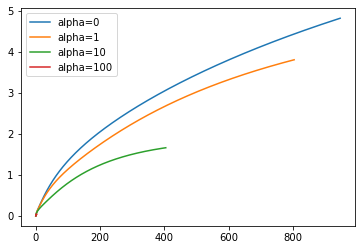

In [64]:
for alpha in [0, 1, 10, 100]:
    seven_X_poly = PolynomialFeatures(1).fit_transform(seven_X)
    w_model, w_history = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    
    L2 = []
    for w_k in w_history:
        L2.append(norm(w_k))
    
    plt.plot(range(len(w_history)), L2, label='alpha={}'.format(alpha))

plt.legend()
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [58]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

In [59]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_samples=100, 
                    n_features=2, 
                    n_informative=2, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, 
                    flip_y=0.0,
                    class_sep=1.0)

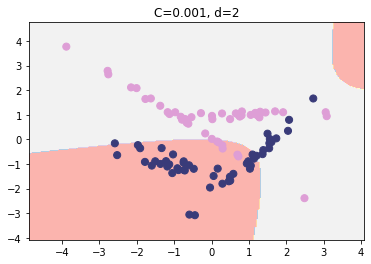

cross entropy = 6.907859226648062


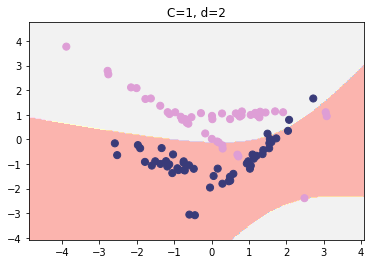

cross entropy = 3.7992893913630814


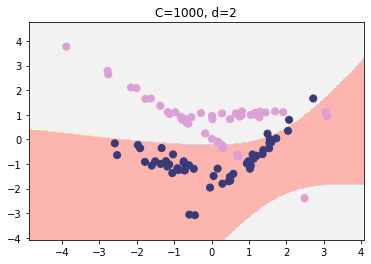

cross entropy = 3.1085138634648684


In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss

for C in [0.001, 1, 1000]:
    model = make_pipeline(PolynomialFeatures(2), LogisticRegression(max_iter=2000, C=C, solver='liblinear'))
    model.fit(X, y)
    plot_2d_clf_problem(X, y, h=model.predict, title='C={}, d={}'.format(C, 2))
    print('cross entropy =', log_loss(y, model.predict(X)))

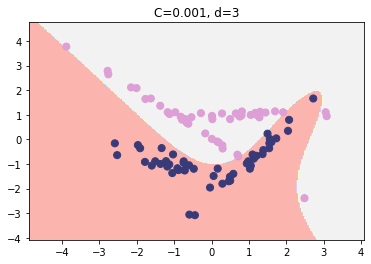

cross entropy = 0.34538776394910786


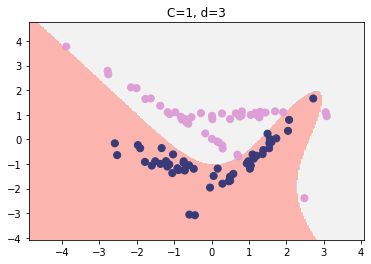

cross entropy = 0.34538776394910786


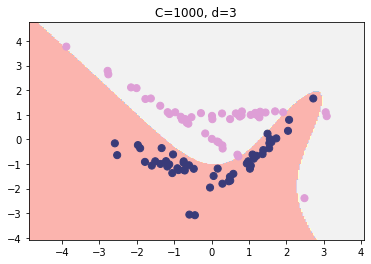

cross entropy = 0.34538776394910786


In [61]:
for C in [0.001, 1, 1000]:
    model = make_pipeline(PolynomialFeatures(3), LogisticRegression(max_iter=2000, C=100, solver='liblinear'))
    model.fit(X, y)
    plot_2d_clf_problem(X, y, h=model.predict, title='C={}, d={}'.format(C, 3))
    print('cross entropy =', log_loss(y, model.predict(X)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?